In [ ]:
#Question 1
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Turn training data and labels into numpy arrays as we won't use PyTorch in this part
X_data = training_data.data.numpy()
y_data = training_data.targets.numpy()

#select two images from training data and then put it into a numpy array
image_1 = X_data[0]
image_2 = X_data[1]
array_of_two_images = np.stack([image_1, image_2], axis=0)

100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 480kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.82MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.74MB/s]


In [ ]:
type(array_of_two_images)

numpy.ndarray

In [ ]:
x_train = torch.tensor(array_of_two_images).unsqueeze(1)

In [ ]:
x_train.shape

torch.Size([2, 1, 28, 28])

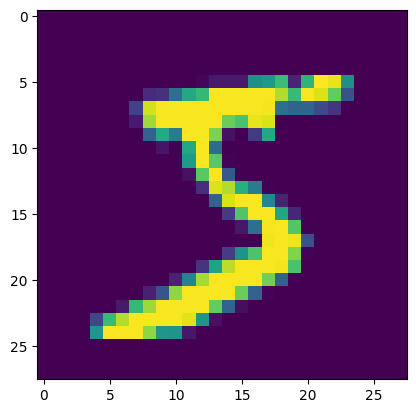

In [ ]:
plt.imshow(array_of_two_images[0])

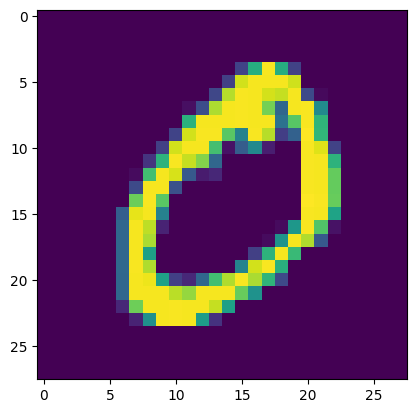

In [ ]:
plt.imshow(array_of_two_images[1])

In [ ]:
class AutoEncoder (nn.Module):
    def __init__(self, input, h1, output):
        super().__init__()
        self.flatten = nn.Flatten()
        self.Linear1 = nn.Linear(input, h1)
        self.Linear2 = nn.Linear(h1, output)
        self.relu = nn.ReLU()
    def forward(self,x):
      x = self.flatten(x)
      x = self.Linear1(x)
      x = self.relu(x)
      x = self.Linear2(x)
      return x

model = AutoEncoder(28*28, 30, 28*28)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train(model, input_data, loss_fn, optimizer):
  model.train()
  for batch, X in enumerate(input_data): #iterate through images
      X = X.float() # convert the image to float
      # Compute prediction and loss
      pred = model(X)
      loss = loss_fn(pred, X.view(-1, 784).float()) # calculate the loss

      # Backpropagation
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

epochs = 100
for t in range(epochs):
       train(model, x_train, loss_fn, optimizer)

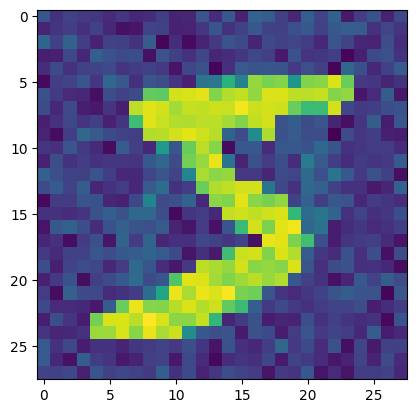

In [ ]:
#printing output from the model
tensor_output = model(x_train[0].float())
tensor_output = tensor_output.reshape(28, 28)
numpy_ouput = tensor_output.detach().numpy()
plt.imshow(numpy_ouput)

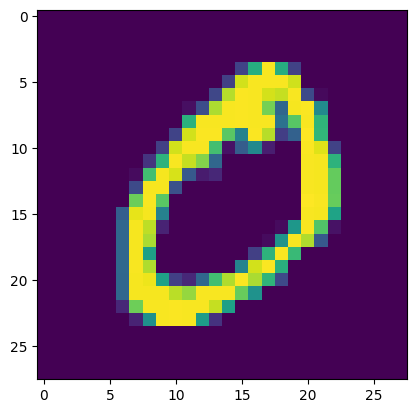

In [ ]:
tensor_output2 = model(x_train[1].float())
tensor_output2 = tensor_output2.reshape(28, 28)
numpy_ouput2 = tensor_output2.detach().numpy()
plt.imshow(numpy_ouput2)

The autoenconder can sucesfully encode the two images with the adam optimizer with only 1 hidden layer that has a width of 30. When the width is lower than this, we observe that the autoenconder outputs a superposition of the two images it was trained on which is interessting.

In [ ]:
#denoising autoencdoder

#creating noisy data for the digit 5 and 0
noisy_images = []

for image in array_of_two_images:
    #creating 500 unique noisy images per digit
    for i in range(500):
        # generate random uniform noise with dimensions of our image shape (28,28)
        noise = np.random.uniform(-25, 25, image.shape) #adding a bit more noise than inthe question to make it a bit more distinct
        # Add noise to the single image
        noisy_image = image + noise
        noisy_images.append(noisy_image)

#stack noisy immages into one np array
noisy_images_array = np.stack(noisy_images, axis=0)



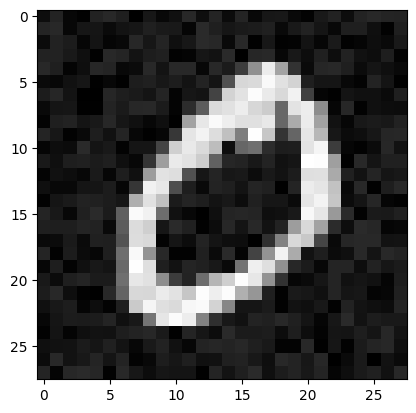

In [ ]:
plt.imshow(noisy_images_array[721], cmap='gray') #print a noisy zero

In [ ]:
#make the noisy data and clean data into a pytorch input
x_train_noisy = torch.tensor(noisy_images_array).unsqueeze(1)
x_train_clean = torch.tensor(np.repeat(array_of_two_images, 500, axis=0)).unsqueeze(1)

def trainQ2 (model, train_noisy, train_clean, loss_fn, optimizer):
  model.train()
  for batch, (train_noisy, train_clean) in enumerate(zip(train_noisy, train_clean)): #iterate through images
      train_noisy = train_noisy.float() # convert the data to float vals
      train_clean = train_clean.float()

      output = model(train_noisy)
      loss = loss_fn(output, train_clean.view(-1, 784))  # Reshape clean_data to make dimensions work

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

modelQ2 = AutoEncoder(28*28, 60, 28*28)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(modelQ2.parameters(), lr=0.01)

epochs = 100


for t in range(epochs):
       train(modelQ2, x_train, loss_fn, optimizer)


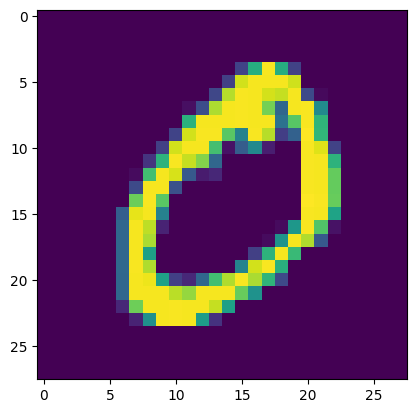

In [ ]:
tensor_output_Q2 = model(x_train_noisy[721].float())
tensor_output_Q2 = tensor_output_Q2.reshape(28, 28)
numpy_ouputQ2 = tensor_output_Q2.detach().numpy()
plt.imshow(numpy_ouputQ2)

#print our netowrks corrected 0

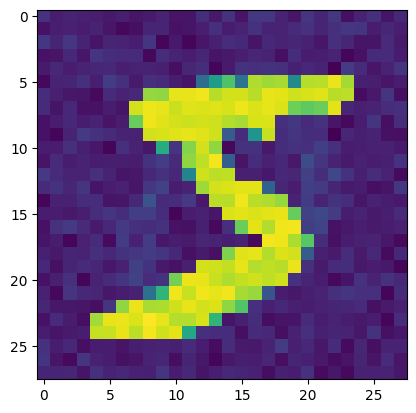

In [ ]:
tensor_output_Q21 = model(x_train_noisy[12].float())
tensor_output_Q21 = tensor_output_Q21.reshape(28, 28)
numpy_ouputQ21 = tensor_output_Q21.detach().numpy()
plt.imshow(numpy_ouputQ21)
#print our netowrks corrected 5

We see that to recover the original image we need a wider hidden layer of around width 60.